# Clustering

In this notebook we will code and use different clustering techniques. The objective is to learn how to use them and understand the effects of different parameters. 

We will test:

- kMeans
- hierarchical clustering
- DBscan

In [0]:
# libraries 

import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4, suppress=True)

# Generate random data

We're going to generate random data normally distributed around three centers, with noise. Each cluster will have 200 points. We concatenate all three groups in a single dataframe. 

In [0]:
NPOINTSPERCLUSTER = 200

In [3]:
# Set three centers
center_1 = np.array([0,0])
center_2 = np.array([3,4])
center_3 = np.array([6,1])

# Generate random data around the three centers
data_1 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_1
data_2 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_2
data_3 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
print(data.shape)

data[0:10]

(600, 2)


array([[-0.5153, -1.1319],
       [-1.6236, -0.7651],
       [-0.7673,  1.4508],
       [ 0.6805,  0.7953],
       [ 0.8653,  2.0825],
       [ 0.8173,  1.2809],
       [-0.3644, -0.7735],
       [-1.159 , -0.3761],
       [-0.6822,  1.1396],
       [-0.8362,  0.2499]])

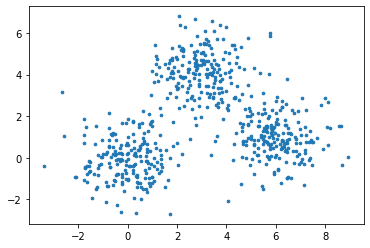

In [4]:
plt.scatter(data[:,0], data[:,1], s=7); #s=size

Please, note that the data we have created does not have a class. It is just a set of points. However, we DO know that they come from different distribution and our objective is to find out them.

# Implementation of K-Means

In this section we will implement kmeans algorithm. 


## Algorithm

```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    # or select K random points from data
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

### Exercise 1: complete the following code so that it follows k-means algorithm

- Assume data is a a (Npoints, dim) numpy array. 
- Hint: use `numpy.linalg.norm()` to compute euclidean distance
- Hint: `np.random.choice()` function may be useful

*15 min*

In [0]:
def kmeans (data, K, plot=False):
    N = data.shape[0]
    dim = data.shape[1]
    
    # generate K random centroids
    centroids = data[np.random.choice(N, K, replace=False)] # To-DO
    
    # initialize vectors
    new_centroids = np.zeros((K, dim))
    distances = np.zeros((N, K))
    
    # repeat until convergence
    niter = 1
    while True:
        
        # compute distance of each point to cluster centroid
        for i in range(K):
            distances[:,i] = np.linalg.norm(data-centroids[i], axis=1) #TO-DO
         
        
        # assign points to closest centroid
        clusters = np.argmin(distances, axis=1) #TO-DO
        
        # recompute clusters' centroids
        # Calculate mean for every cluster and update the center
        for i in range(K):
            new_centroids[i] = np.mean(data[clusters == i], axis=0) #TO-DO
        
        # compute if there is any variation
        if np.array_equal(centroids, new_centroids):
            break
            
        centroids = new_centroids.copy()

        if plot:
            # solution
            plt.scatter(data[:,0], data[:,1], c=clusters, cmap='plasma', linewidths=0);
            for k in range(K):
                plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
            plt.show()

        niter+=1
        
    return clusters, centroids

In [0]:
# let's try our algorithm
K = 3
clusters, centroids = kmeans(data, K)

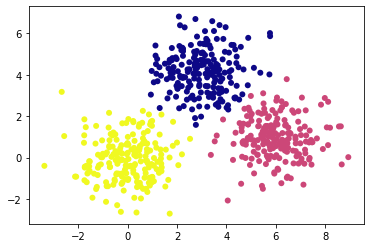

In [7]:
plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0);

Now we are going to compare the original 'cluster' where each point comes from, with the asigned cluster. In order to do that, we just create a vector with the original class (color) and use that to plot. 

Please, recall that this is something we can do here because we're creating a synthetic dataset, but normally we won't be able to do it, since we don't know how the data has been generated.

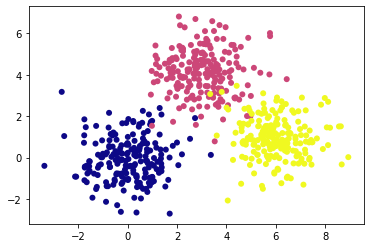

In [8]:
# comparison to original distribution where data came from
original = np.concatenate((np.repeat(0, NPOINTSPERCLUSTER), 
                         np.repeat(1, NPOINTSPERCLUSTER), 
                         np.repeat(2, NPOINTSPERCLUSTER)))
plt.scatter(data[:,0], data[:,1], c=original, cmap="plasma", linewidths=0);

In [9]:
# comparison to original distribution where data came from
# we create a df with the clusters and compute the 'confussion' matrix

df = pd.DataFrame({'original' : original, 'kmeans': clusters})
df_g = df.groupby(['original', 'kmeans']).size().reset_index(name='n')\
    .pivot(index='original', columns='kmeans', values='n').fillna(0)
df_g

kmeans,0,1,2
original,,,
0,2.0,1.0,197.0
1,192.0,6.0,2.0
2,5.0,195.0,0.0


Notice that class labels (kmeans) may not agree with original class number.

In [10]:
from sklearn.metrics import accuracy_score

mapping = {i:v for (i,v) in df_g.idxmax(axis=1).items()}
print(mapping)
accuracy_score([mapping[o] for o in original], clusters)

{0: 2, 1: 0, 2: 1}


0.9733333333333334

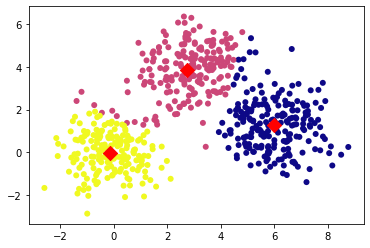

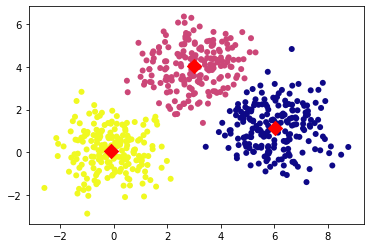

In [0]:
K = 3
clusters, centroids = kmeans(data, K, plot=True)

### Exercise 2: Take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

15 minutes. 

In [0]:
# Set three centers
center_1 = np.array([0,0])
center_2 = ...
center_3 = ...
...

# Generate random data around the three centers
data_1 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_1
data_2 = ...
... 

data = np.concatenate((data_1, data_2, ...), axis = 0)

k = ...
kmeans(data, k)

## Computing how good the cluster partition is

Remember SSE (Sum of Squared Error):
$$
SSE = \sum_{i=1}^N (x_i - C_{(X_i)})^2
$$
where $C_{(X_i)}$ represents the cluster centroid of $X_i$.



### Exercise 3: complete SSE function and compute clustering metrics for different number of clusters

In [0]:
def sse(data, clusters, centroids):
    return np.sum(np.square(np.linalg.norm(data - centroids[clusters], axis=1))) # To-Do

In [12]:
ks = range(1, 20)
sse_errors = np.zeros(len(ks))

for i, k in enumerate(ks):
    clusters_, centroids_ = kmeans(data, k)
    sse_errors[i] = sse(data, clusters_, centroids_)
    print(k, sse_errors[i])
    
    #if np.isnan(sse_errors[i]):
    #    print(clusters_)
    #    print(centroids_)

1 6791.95515127868
2 3168.571650861399
3 1220.4790794082637
4 1082.2911426550907
5 935.0098922221187
6 816.1920897613626
7 740.9886572065002
8 648.6928881047205
9 619.7324558932838
10 497.35266784178515
11 479.3878483096231
12 488.8480743647001
13 396.9865005988769
14 394.1675338052704
15 361.97312679058683
16 349.6918803200597
17 330.53516429597414
18 309.1055033591249
19 284.005064575353


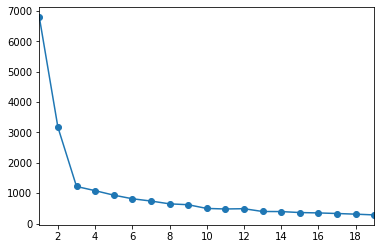

In [13]:
plt.plot(ks, sse_errors, 'o-');
plt.xlim(min(ks), max(ks));

# scikit-learn K-means

Now we are going to use scikit-learn library for our exercise

KMeans works as other models in sklearn:

- define the model (and parameters)
- fit the model on training dataset
- apply the fitted model on another dataset (can be the same dataset)

In [0]:
from sklearn.cluster import KMeans

In [0]:
# inspect help
?KMeans

In [0]:
# define the model
model = KMeans(n_clusters = 3)

In [0]:
# fit the model on training data
model = model.fit(data)

In [18]:
# press tab to see available methods
#model. #press tab
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_) # sse

[[ 3.0027  4.1682]
 [-0.0009 -0.0661]
 [ 6.0082  0.9324]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [19]:
# check inertia is our sse defined function
abs(model.inertia_ - sse(data, model.labels_, model.cluster_centers_)) < 0.01

True

In [20]:
# apply the fitted model 
# if applied to the same data, we get model.labels_
clusters_sk = model.predict(data)
all(model.labels_ == clusters_sk)

True

In [21]:
clusters_sk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

In [0]:
def plot_clustering(data, clusters, centroids = []):
    
    K_ = len(set(clusters))
    
    plt.figure(figsize=(8,4))
    plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0)

    if centroids != []:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
        
    plt.show()

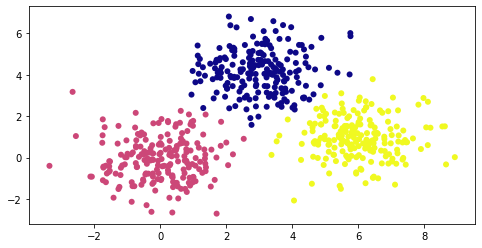

In [23]:
plot_clustering(data, clusters_sk)

In [24]:
# Centroid values
centroids_sk = model.cluster_centers_
centroids_sk

array([[ 3.0027,  4.1682],
       [-0.0009, -0.0661],
       [ 6.0082,  0.9324]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


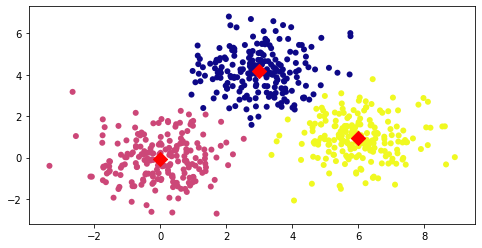

In [25]:
plot_clustering(data, clusters_sk, centroids_sk)

In [0]:
# compare with our implementation

print(centroids)
print(centroids_sk)

#plot_clustering(data, clusters, centroids)
#plot_clustering(data, clusters_sk, centroids_sk)

[[ 6.0201  1.1588]
 [ 2.9877  4.0262]
 [-0.1004  0.0784]]
[[-0.1004  0.0784]
 [ 3.006   4.0303]
 [ 6.017   1.1408]]


# Hierarchical Clustering

In this section we will learn how to apply Hierarchical Clustering in Python. 

We will use `scipy` package:

- `linkage` function computes the distance matrix between the points
- `dendrogram` function plots the dendrogram using the distances
- `fcluster` function performs a clustering assignment according to different parameters

![texto alternativo](https://drive.google.com/uc?id=1MdZuOQ-SNcglxN0IXEobgrOTZR7NuaM-)

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [0]:
?linkage

In [0]:
Z = linkage(data, 'ward') #'single', 'ward', ...

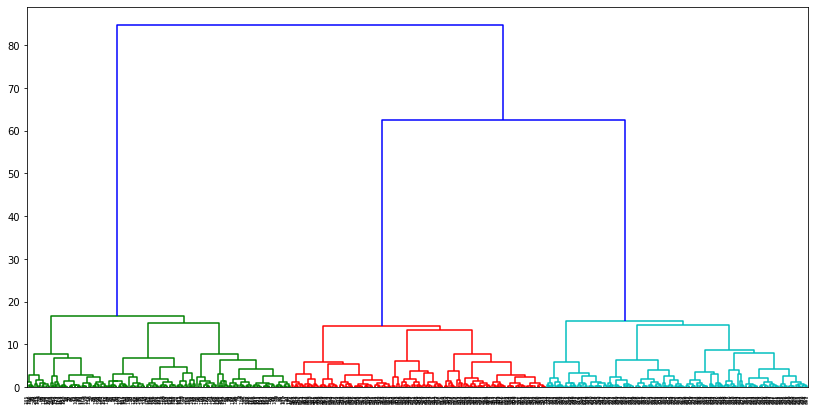

In [28]:
plt.figure(figsize=(14, 7))
dendrogram(Z)
plt.show()

Now let's understand how the algorithm works. 

It follows an agglomerative approach, so *close* points are merged. 

`linkage` returns how points are merged at each iteration. The output is: [`id_node_1`, `id_node_2`, `distance`, `number_of_points_in_group`]

In [29]:
Z[0:20]

array([[466.    , 569.    ,   0.0084,   2.    ],
       [459.    , 500.    ,   0.0121,   2.    ],
       [311.    , 369.    ,   0.0122,   2.    ],
       [ 59.    , 170.    ,   0.0129,   2.    ],
       [425.    , 527.    ,   0.0131,   2.    ],
       [414.    , 546.    ,   0.0145,   2.    ],
       [130.    , 137.    ,   0.0158,   2.    ],
       [458.    , 575.    ,   0.0202,   2.    ],
       [512.    , 584.    ,   0.0208,   2.    ],
       [400.    , 592.    ,   0.0233,   2.    ],
       [ 30.    ,  77.    ,   0.0234,   2.    ],
       [344.    , 383.    ,   0.0237,   2.    ],
       [495.    , 529.    ,   0.0249,   2.    ],
       [ 99.    , 139.    ,   0.0253,   2.    ],
       [426.    , 504.    ,   0.0268,   2.    ],
       [448.    , 585.    ,   0.0274,   2.    ],
       [215.    , 340.    ,   0.028 ,   2.    ],
       [443.    , 469.    ,   0.0283,   2.    ],
       [561.    , 563.    ,   0.0324,   2.    ],
       [212.    , 304.    ,   0.0378,   2.    ]])

In [30]:
# indices
np.where(Z[:,0] > data.shape[0])[0:20]

(array([185, 204, 216, 226, 231, 236, 253, 269, 275, 278, 286, 288, 301,
        308, 311, 312, 313, 316, 322, 326, 327, 328, 331, 332, 334, 336,
        337, 340, 341, 345, 352, 355, 359, 361, 362, 364, 365, 367, 369,
        370, 371, 372, 375, 377, 378, 379, 380, 381, 383, 384, 387, 388,
        389, 391, 392, 393, 395, 396, 397, 399, 400, 401, 404, 405, 406,
        407, 408, 409, 411, 413, 414, 420, 421, 423, 427, 429, 430, 431,
        432, 434, 435, 436, 437, 438, 440, 441, 442, 443, 445, 446, 448,
        450, 451, 453, 455, 457, 458, 460, 461, 462, 463, 464, 465, 467,
        468, 469, 471, 472, 473, 474, 477, 478, 479, 482, 483, 484, 486,
        487, 488, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500,
        501, 502, 503, 504, 505, 506, 507, 508, 510, 511, 512, 513, 514,
        515, 516, 517, 518, 519, 522, 523, 524, 525, 526, 527, 528, 529,
        530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 542, 543,
        544, 545, 546, 548, 549, 551, 552, 553, 554

In [31]:
Z[Z[:,0] > data.shape[0]][0:20]

array([[677.    , 682.    ,   0.1521,   5.    ],
       [610.    , 690.    ,   0.1706,   4.    ],
       [699.    , 728.    ,   0.1818,   4.    ],
       [716.    , 789.    ,   0.1879,   5.    ],
       [627.    , 715.    ,   0.1903,   4.    ],
       [659.    , 662.    ,   0.1939,   5.    ],
       [660.    , 706.    ,   0.2144,   5.    ],
       [635.    , 718.    ,   0.231 ,   4.    ],
       [694.    , 719.    ,   0.2352,   4.    ],
       [704.    , 753.    ,   0.2388,   4.    ],
       [713.    , 766.    ,   0.2522,   4.    ],
       [664.    , 695.    ,   0.2548,   4.    ],
       [760.    , 762.    ,   0.2706,   5.    ],
       [602.    , 873.    ,   0.2832,   5.    ],
       [697.    , 872.    ,   0.2867,   7.    ],
       [742.    , 828.    ,   0.2875,   6.    ],
       [657.    , 772.    ,   0.291 ,   5.    ],
       [737.    , 746.    ,   0.297 ,   5.    ],
       [689.    , 883.    ,   0.3057,   6.    ],
       [768.    , 840.    ,   0.31  ,   4.    ]])

### Exercise 4: dendrogram plotting options

Investigate dendrogram plotting options and play with them.

- p:
- truncate_mode: 'lastp', 'level'
- color_threshold
- orientation
- count_sort: False, 'ascending'/True, 'descendent'
- distance_sort: False, 'ascending'/True, 'descendent'
- show_leaf_counts: boolean (True)
- show_contracted: boolean (False)
- above_threshold_color = 'b'

*15 min*

In [0]:
?dendrogram

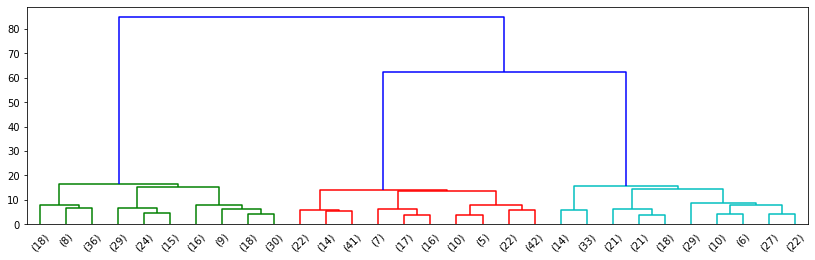

In [32]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, truncate_mode='lastp')
plt.show()

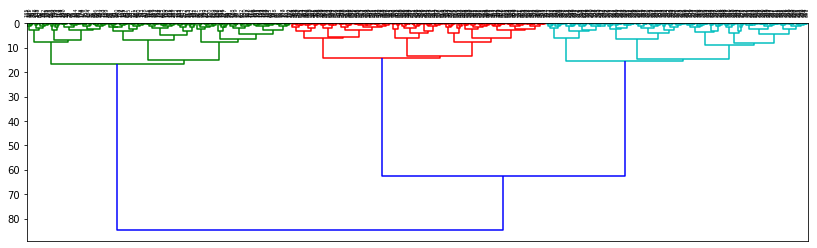

In [33]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, orientation="bottom")
plt.show()

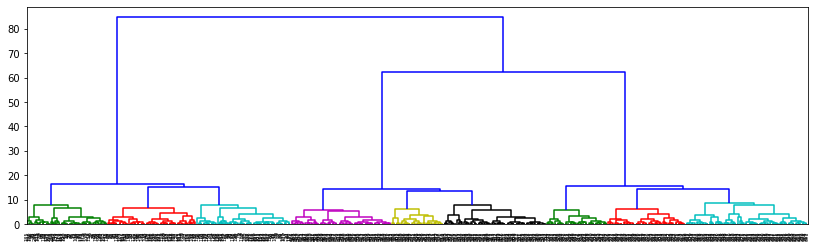

In [34]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, color_threshold=10)
plt.show()

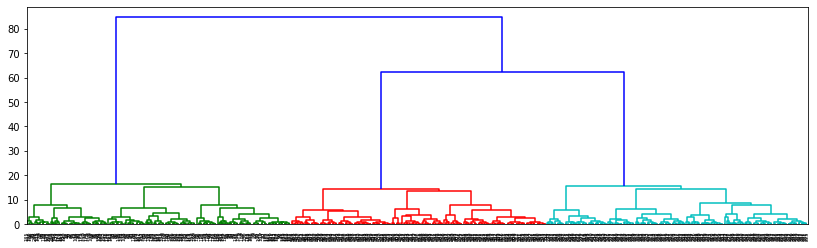

In [35]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, count_sort=True)  # no difference
plt.show()

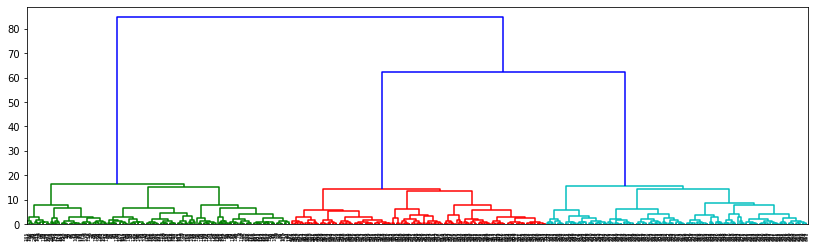

In [36]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, distance_sort=True) # no difference 
plt.show()


## Getting the cluster partition

In order to assign a cluster to each sample we first need to set the cut_off distance. We will visually explore what this value is and use it for partitioning. 

In [0]:
?dendrogram

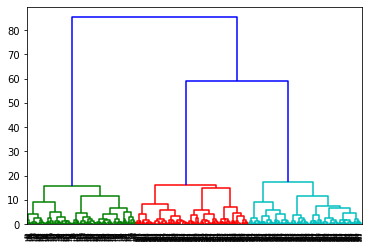

In [0]:
dendrogram(Z, color_threshold = 25)
plt.show()

In [0]:
from scipy.cluster.hierarchy import fcluster

?fcluster

In [37]:
cut_distance = 25
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([1, 2, 3], dtype=int32), array([203, 196, 201]))

In [38]:
clusters_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

### Exercise 5: change cut_distance and see how the number of clusters change

It should match the dendrogram plotting

In [0]:
# exercise
cut_distance = 70
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([1, 2], dtype=int32), array([196, 404]))

In [0]:
cut_distance = 10
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([83, 42, 71, 93, 57, 52, 75, 34, 93]))

### Exercise 6 (home): change `method` parameter in the linkage function and observe the results

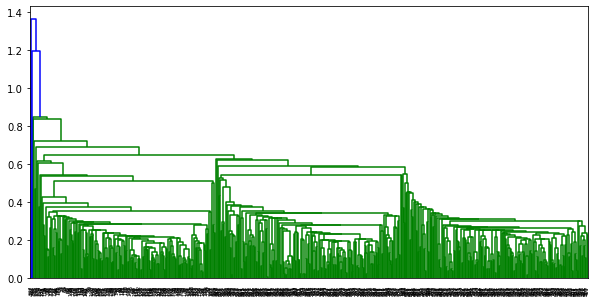

In [0]:
# To-Do
linked = linkage(data, 'single') #'single', 'ward', 'complete', 'average', ...
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.show()

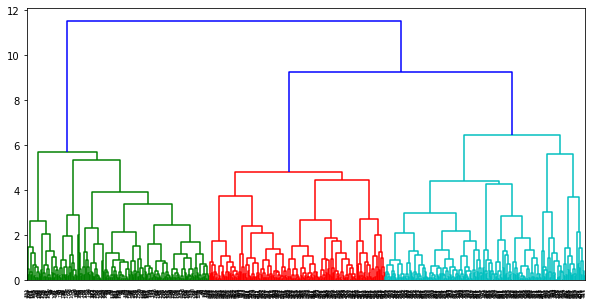

In [0]:
# To-Do
linked = linkage(data, 'complete') #'single', 'ward', 'complete', 'average', ...
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.show()

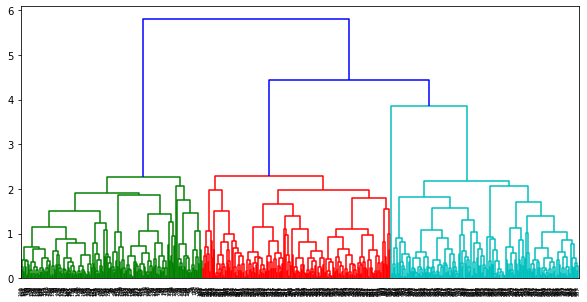

In [0]:
# To-Do
linked = linkage(data, 'average') #'single', 'ward', 'complete', 'average', ...
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.show()

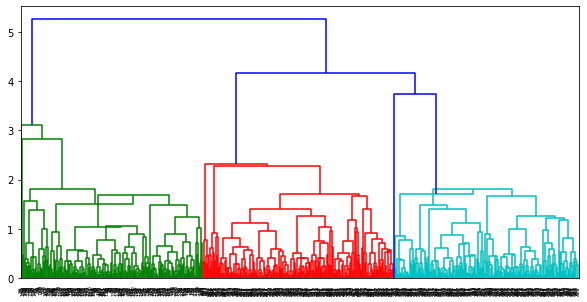

In [0]:
# To-Do
linked = linkage(data, 'centroid') #'single', 'ward', 'complete', 'average', ...
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.show()

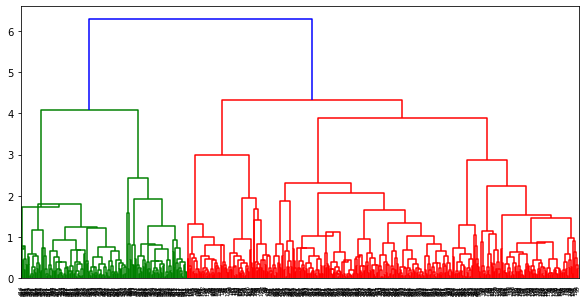

In [0]:
# To-Do
linked = linkage(data, 'median') #'single', 'ward', 'complete', 'average', ...
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.show()

#### AgglomerativeClustering in scikit-learn

In order to perform the clustering partition, we can also use `AgglomerativeClustering` from `sklearn` once we have selected the desired number of clusters. 

In [0]:
from sklearn.cluster import AgglomerativeClustering

# define the model
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

# fit data and predict 
clusters = cluster.fit_predict(data)

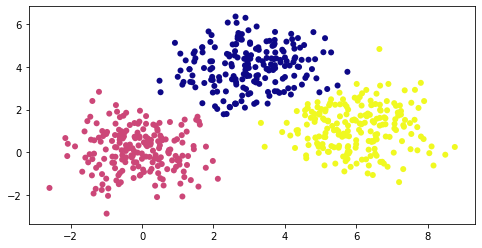

In [0]:
plot_clustering(data, clusters)

### Comparison kmeans and hierarchical

Now let's compare the result of both algorithms when the number of clusters is not optimal

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


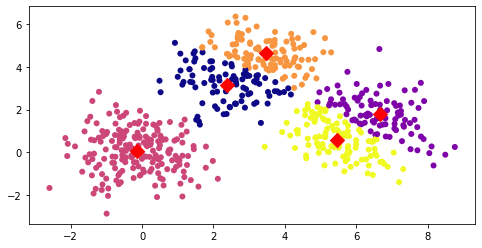

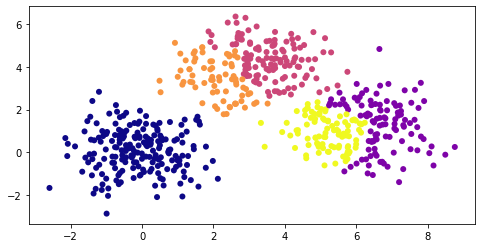

In [0]:
NCLUS = 5

km = KMeans(n_clusters=NCLUS)
clusters_km = km.fit_predict(data)
plot_clustering(data, clusters_km, km.cluster_centers_)

hier = AgglomerativeClustering(n_clusters=NCLUS, affinity='euclidean', linkage='ward')
clusters_hier = hier.fit_predict(data)
plot_clustering(data, clusters_hier)

# DBSCAN

In this section we will learn how DBscan algorithm works and what's the effect of its parameters in the clustering result. 

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
dbs = DBSCAN(eps=0.5, min_samples=5)
dbs = dbs.fit(data)

In [41]:
dbs.labels_[0:50]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [42]:
id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 4 clusters


(array([-1,  0,  1,  2]), array([ 60, 176, 359,   5]))

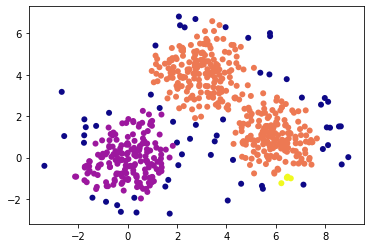

In [43]:
plt.scatter(data[:,0], data[:,1], c=dbs.labels_, cmap="plasma", linewidths=0);

### Exercise 7: play with the parameters `eps` and `min_samples` and see how it affects the clustering partition
10 min

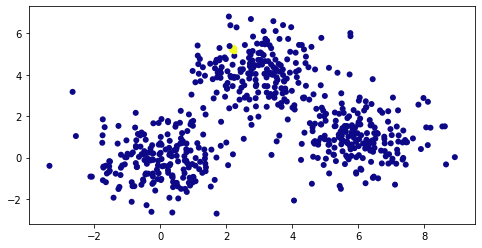

In [44]:
# exercise
dbs = DBSCAN(eps=0.1, min_samples=5) # todos son outliers
dbs = dbs.fit(data)
plot_clustering(data, dbs.labels_)

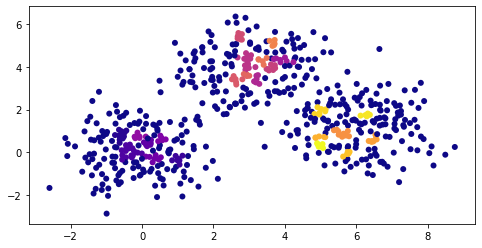

In [0]:
dbs = DBSCAN(eps=0.2, min_samples=5)
dbs = dbs.fit(data)
plot_clustering(data, dbs.labels_)

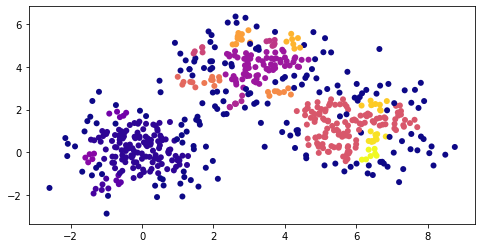

In [0]:
# exercise
dbs = DBSCAN(eps=0.3, min_samples=5)
dbs = dbs.fit(data)
plot_clustering(data, dbs.labels_)

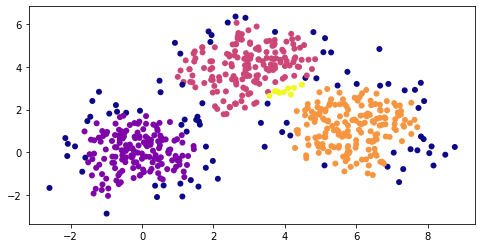

In [0]:
# exercise
dbs = DBSCAN(eps=0.5, min_samples=10)
dbs = dbs.fit(data)
plot_clustering(data, dbs.labels_)

# New data : non-convex datasets

Now we will apply DBscan on non convex data to see the differences with k-means. We will also learn how to load already-predefined datasets from `sklearn`

In [0]:
from sklearn import datasets

nsamples = 1000

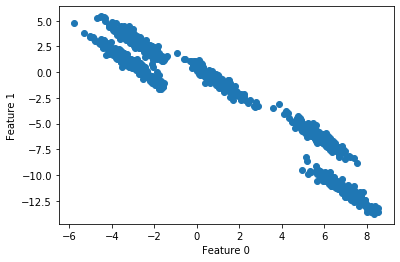

In [0]:
# make_blobs
# this creates 'centers' circles
# we will change the covariance so that the clusters become ellipses

X, y = datasets.make_blobs(random_state=170, n_samples=nsamples, centers = 5)
transformation = np.random.RandomState(74).normal(size=(2, 2))
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Compare DBscan against Kmeans on that data

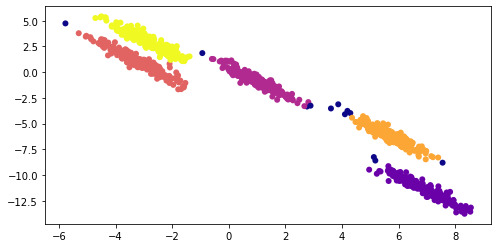

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


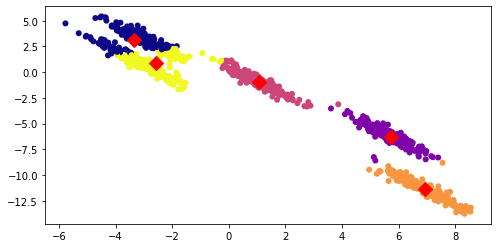

In [0]:
dbscan_model = DBSCAN(eps=0.4, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 5)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

In [0]:
# Exercise: test other datasets
# datasets.make_circles
# datasets.make_moons
# datasets.make_s_curve (Hint: use dimensions 0 and 2 of the generated dataset)
# datasets.make_swiss_roll (Hint: use dimensions 0 and 2 of the generated dataset)

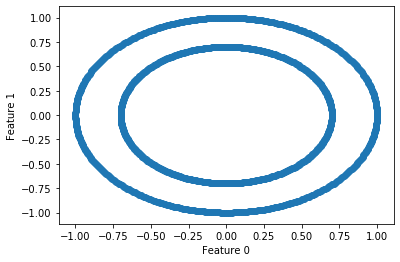

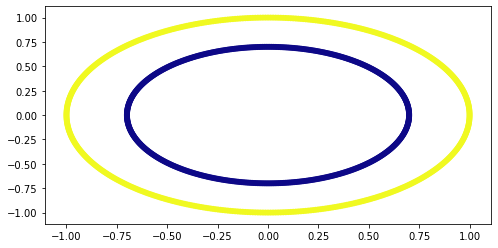

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


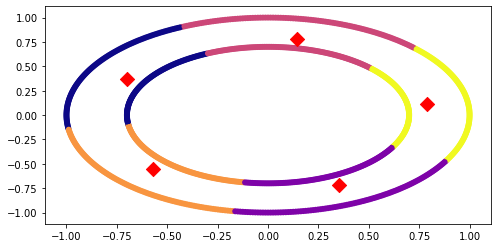

In [0]:
# make_circles

X, y = datasets.make_circles(n_samples=nsamples, factor=0.7)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

dbscan_model = DBSCAN(eps=0.1, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 5)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

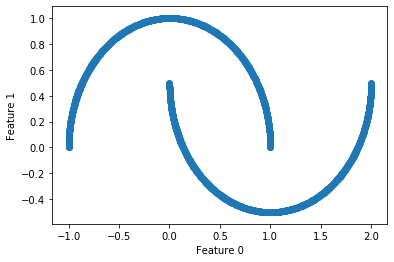

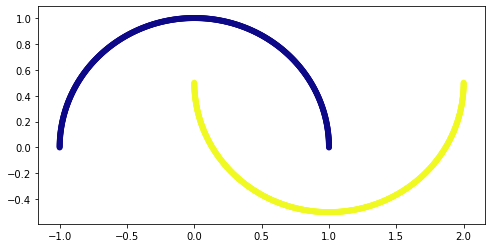

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


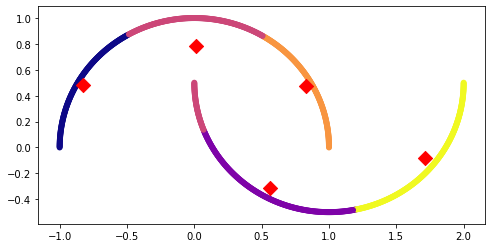

In [0]:
# make_mooons
X, y = datasets.make_moons(n_samples=nsamples)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

dbscan_model = DBSCAN(eps=0.4, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 5)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

S-Curve and Swiss Roll are 3D datasets, so we will do 3D plotting (and 3D clustering). 

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
?datasets.make_s_curve

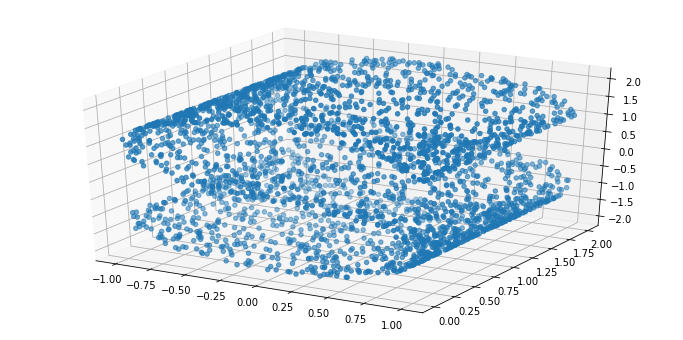

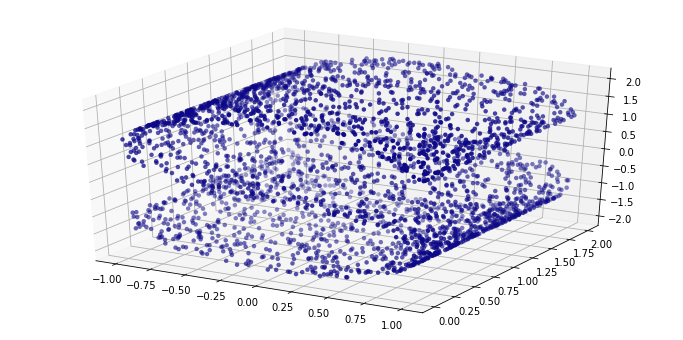

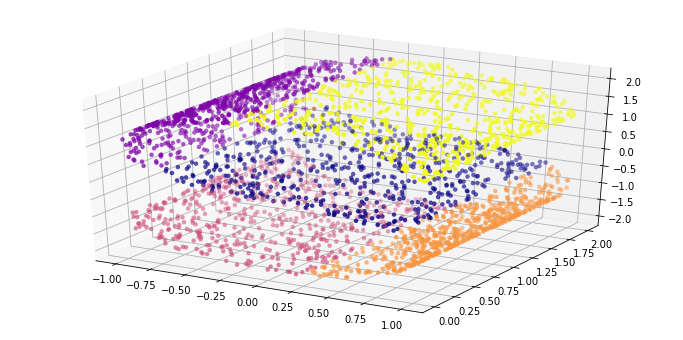

In [0]:
# make_s_curve
X, y = datasets.make_s_curve(n_samples=nsamples*3, noise=0.0, random_state=10)

# plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

plt.show()

dbscan_model = DBSCAN(eps=0.4, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 5)
kmeans_model = kmeans_model.fit(X)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=dbscan_model.labels_, cmap="plasma", linewidths=0)
plt.show()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_model.labels_, cmap="plasma", linewidths=0)
plt.show()

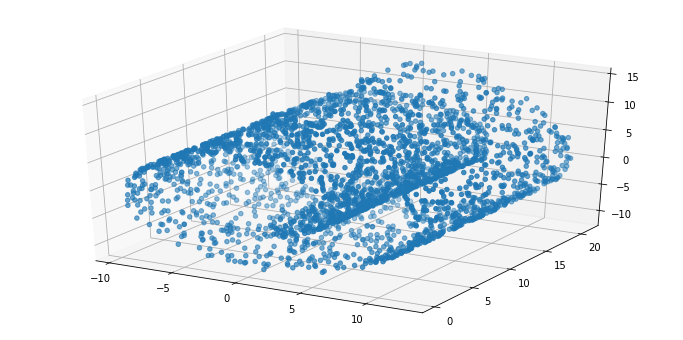

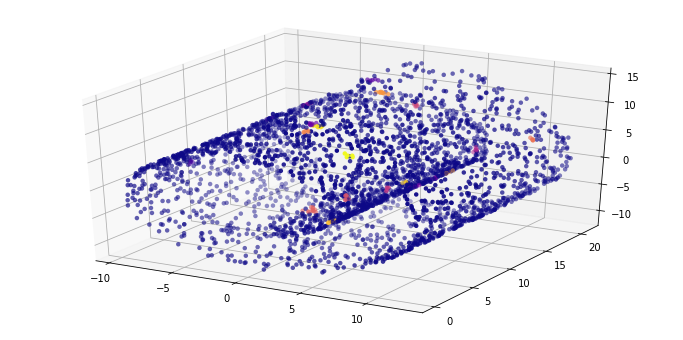

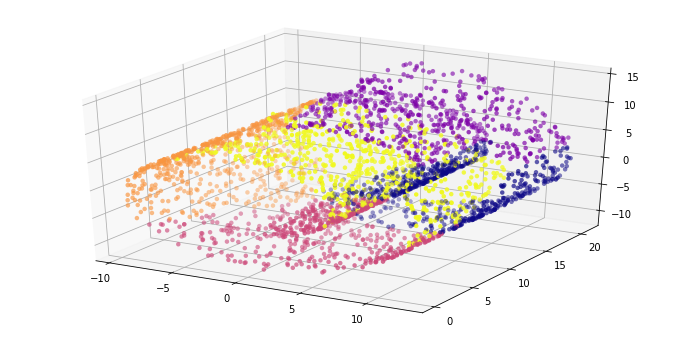

In [0]:
# make_swiss_roll
X, y = datasets.make_swiss_roll(n_samples=nsamples*3)

# plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

plt.show()

dbscan_model = DBSCAN(eps=0.4, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 5)
kmeans_model = kmeans_model.fit(X)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=dbscan_model.labels_, cmap="plasma", linewidths=0)
plt.show()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_model.labels_, cmap="plasma", linewidths=0)
plt.show()

Some code and ideas are based on:

- https://mubaris.com/posts/kmeans-clustering/
- https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


### End.